In [439]:
import pandas as pd
import numpy as np
import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt

# pull stock market data #

In [456]:
# define time paramaters for pulling market data
start = datetime(2004, 2, 10) # date kanye's first studio album came out (The College Dropout)
end = datetime(2019, 11, 25)# date kanye's latest studio album came out (Jesus Is King)
 
# pull VTI data and store in dataframe
df = web.DataReader("vti", 'yahoo', start, end)

In [457]:
# make 'Date' a column, not index
df.reset_index(inplace = True) 
df['Date'] = pd.to_datetime(df['Date']) 

# add colum for 'Change', showing how the asset's performance changed throughout each market session
df['Change'] = (df['Close'] - df['Open']) / df['Open']

# preview results
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Change
0,2004-02-10,55.465000,55.000000,55.150002,55.395000,133600.0,40.496407,0.004442
1,2004-02-11,55.990002,55.224998,55.400002,55.855000,341400.0,40.832680,0.008213
2,2004-02-12,55.950001,55.654999,55.950001,55.705002,200400.0,40.723026,-0.004379
3,2004-02-13,55.875000,55.255001,55.820000,55.419998,209000.0,40.514675,-0.007166
4,2004-02-17,56.000000,55.705002,55.799999,56.000000,298000.0,40.938690,0.003584


# kanye album data #

In [469]:
# create dictionary with album names and release dates
kanye_dict = {'The College Dropout' : '2004-02-10',
    'Late Registration' : '2005-08-30',
    'Graduation' : '2007-09-11',
    '808s & Heartbreak' : '2008-11-24',
    'My Beautiful Dark Twisted Fantasy' : '2010-11-22',
    'Yeezus' : '2013-06-18',
    'The Life of Pablo' : '2016-02-16',
    'Ye' : '2018-06-01',
    'Jesus Is King' : '2019-10-25'}

# convert release dates to datetime format
for values in kanye_dict: 
        kanye_dict[values] = datetime.strptime(kanye_dict[values], "%Y-%m-%d") 

In [470]:
# convert kanye dictionary into dataframe
kanye_df = pd.DataFrame.from_dict(kanye_dict, orient='index', columns=['release_date']).reset_index()

# rename column
kanye_df.rename(columns = {'index':'album_name'}, inplace = True)

# market performance when kanye releases an album #

In [471]:
# merge the 2 dataframes on common dates to isolate market data for days that a kanye album was released
market_album_df = df.merge(kanye_df, how = 'inner', left_on = 'Date', right_on = 'release_date').drop(columns = 'release_date')
market_album_df

,Date,High,Low,Open,Close,Volume,Adj Close,Change,album_name
0,2004-02-10,55.465000,55.000000,55.150002,55.395000,133600.0,40.496407,0.004442,The College Dropout
1,2005-08-30,59.740002,59.384998,59.685001,59.715000,269400.0,44.724731,0.000503,Late Registration
2,2007-09-11,73.129997,72.394997,72.400002,73.099998,636800.0,56.739326,0.009668,Graduation
3,2008-11-24,42.490002,39.680000,40.000000,41.630001,42316200.0,33.095093,0.040750,808s & Heartbreak
4,2010-11-22,61.820000,61.090000,61.520000,61.820000,2431800.0,51.377399,0.004876,My Beautiful Dark Twisted Fantasy
5,2013-06-18,85.519997,84.790001,84.790001,85.330002,2095100.0,74.615440,0.006369,Yeezus
6,2016-02-16,96.089996,94.959999,95.620003,96.080002,3577700.0,88.569595,0.004811,The Life of Pablo
7,2018-06-01,141.649994,140.759995,140.929993,141.500000,1857800.0,136.103271,0.004045,Ye
8,2019-10-25,153.759995,152.419998,152.490005,153.449997,2461600.0,151.868057,0.006295,Jesus Is King


### visualization ###

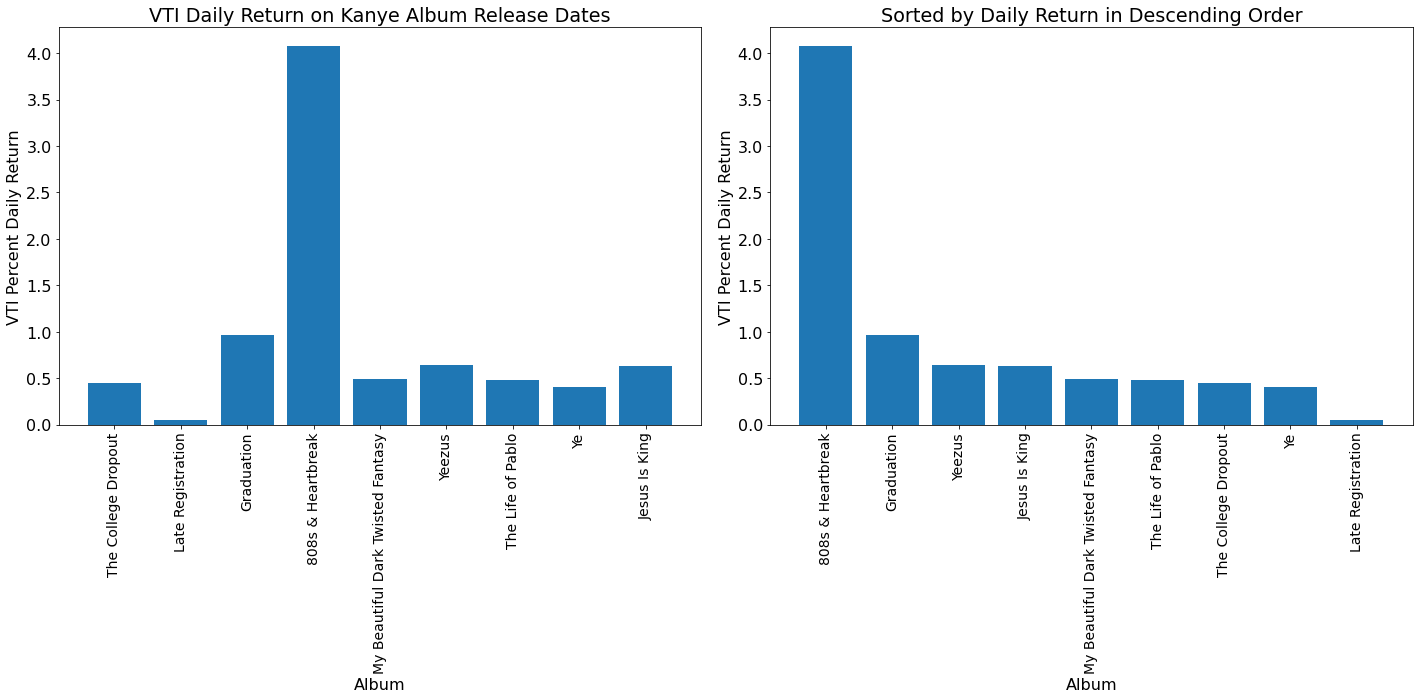

In [472]:
# chart formatting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# create 2 versions of the dataset (sorted differently)
df_plot_1a = market_album_df
df_plot_1b = market_album_df.sort_values('Change', ascending = False)

# grab just the series we need
x1 = df_plot_1a['album_name']
y1 = df_plot_1a['Change'] * 100.00

x2 = df_plot_1b['album_name']
y2 = df_plot_1b['Change'] * 100.00

# plots
axes[0].bar(x1, y1)
axes[1].bar(x2, y2)


# chart title
axes[0].set_title('VTI Daily Return on Kanye Album Release Dates')
axes[1].set_title('Sorted by Daily Return in Descending Order')

# axis titles
for ax in axes.flat:
    ax.set(xlabel='Album', ylabel='VTI Percent Daily Return')

# axis formatting
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=16)
    
# label sizes
plt.rcParams.update({'font.size': 16})

fig.tight_layout()

# comparing kanye album release dates with other dates #

In [473]:
# get list of the kanye's album release dates
release_dates = kanye_dict.values()

# show dates
for i in release_dates:
    print(i)

2004-02-10 00:00:00
2005-08-30 00:00:00
2007-09-11 00:00:00
2008-11-24 00:00:00
2010-11-22 00:00:00
2013-06-18 00:00:00
2016-02-16 00:00:00
2018-06-01 00:00:00
2019-10-25 00:00:00


In [474]:
# number of market sessions in analysis period where kanye did not release an album
market_sessions = df[df['Date'].isin(release_dates) == False]
len(market_sessions)

3968

In [475]:
# number of market sessions in analysis period where kanye did not release an album AND VTI had a positive return
market_sessions_positive = (market_sessions[(market_sessions['Change'] > 0)])
len(market_sessions_positive)

2060

In [476]:
# percent of dates where VTI had a positive return 
pct_positive = len(market_sessions_positive) / len(market_sessions)
print(pct_positive)

0.5191532258064516


### dataframe construction ###

In [477]:
# create dataframe
df_viz = pd.DataFrame(columns = ['Did Kanye Release an Album?','% of Dates VTI is Positve'])

# add in values for column 'Did Kanye Release an Album?'
df_viz.loc[0,'Did Kanye Release an Album?'] = 'Yes'
df_viz.loc[1,'Did Kanye Release an Album?'] = 'No'

# add in values for column '% of Dates VTI is Positve'
df_viz.loc[0,'% of Dates VTI is Positve'] = 1.00
df_viz.loc[1,'% of Dates VTI is Positve'] = pct_positive

# show dataframe
df_viz

,Did Kanye Release an Album?,% of Dates VTI is Positve
0,Yes,1
1,No,0.519153


### visualization ###

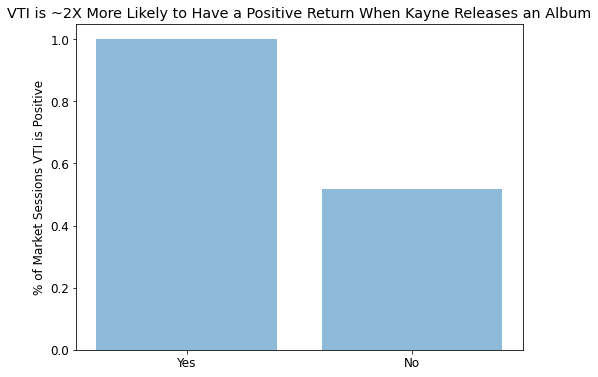

In [479]:
# setup
released_album_option_set = df_viz['Did Kanye Release an Album?']
y_pos = np.arange(len(released_album_option_set))
vti_performnce = df_viz['% of Dates VTI is Positve']

# plotting
plt.bar(y_pos, vti_performnce, align='center', alpha=0.5)
plt.xticks(y_pos, released_album_option_set)
plt.ylabel('% of Market Sessions VTI is Positive')
plt.title('VTI is ~2X More Likely to Have a Positive Return When Kayne Releases an Album')

# show plot
plt.show()

# chart sizing
plt.rcParams["figure.figsize"] = (8,6)

# set text size
plt.rc('font', size=12)